<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%205/Homework_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

import keras.backend as K

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_cat = to_categorical(Y_train)
y_test_cat = to_categorical(Y_test)
X_train.shape, y_test_cat.shape


170500096/170498071 [==============================] - 45s 0us/step


((50000, 32, 32, 3), (10000, 10))

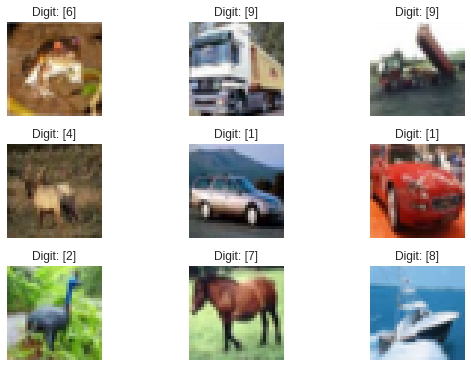

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
import math

In [7]:
K.clear_session()

model = Sequential()

'''
Section 1: two instances of 40 3x3 kernel convolution layers with
batch normalization and 2x2 max pooling
20% Dropout
'''
model.add(Conv2D(40, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001), 
                 input_shape=(32, 32, 3)))
model.add(Conv2D(40, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

'''
Section 2: two instances of 80 3x3 kernel convolution layers with
batch normalization and 2x2 max pooling
30% Dropout
'''
model.add(Conv2D(80, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(80, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

'''
Section 3: two instances of 160 3x3 kernel convolution layers with
batch normalization and 2x2 max pooling
40% Dropout
'''
model.add(Conv2D(160, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(160, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

'''
Section 4: Dense layer with softmax output
40% Dropout
'''
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', 
                kernel_regularizer=regularizers.l2(0.001)))

# Early stopping callback criteria
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
callbacks_list = [es]

# Learning rate schedule with constant decay
start_learning_rate = 10e-5
end_learning_rate = 10e-7
epochs = 300
decay_rate = (start_learning_rate - end_learning_rate) / epochs

optimizer = Adam(lr=start_learning_rate, decay=decay_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

h = model.fit(X_train, y_train_cat, batch_size=128,
              callbacks=callbacks_list,epochs=epochs, 
              verbose=1, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 40)        1120      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 40)        14440     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 40)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 40)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 40)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

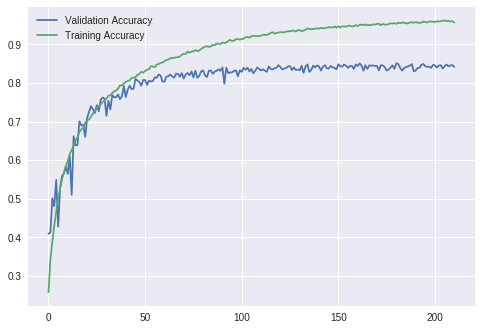

In [8]:
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.plot(h.history['acc'], label='Training Accuracy')
plt.legend()

In [9]:
# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test_cat, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 84.32%
